In [185]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D

In [186]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id

    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.r += self.dt * self.v
        self.v += self.dt * self.a
        
    def CheckWallLimits(self,limits,dim=3):
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]    
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])

In [187]:
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)

In [188]:
def GetParticles(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        Particles_.append(p)
        
    return Particles_

In [189]:
Limits = np.array([10.,10.,10.])

In [190]:
def RunSimulation(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):

            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
    return Particles

In [191]:
Particles = RunSimulation(t,100,Velo=50)


100%|█████████████████████████████████████████████████████████████████████████████| 3001/3001 [00:05<00:00, 553.71it/s]


In [192]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [193]:
redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


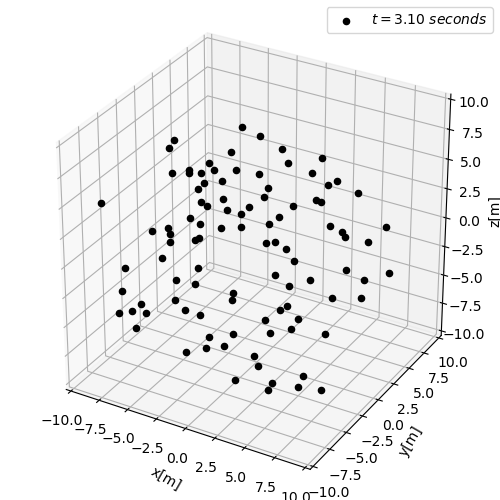

In [194]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[2],Limits[2])
    ax.set_xlabel('x[m]', rotation=-30)
    ax.set_ylabel('y[m]', rotation=60)
    ax.set_zlabel('z[m]',rotation=90)
  
def Update(i):
    plot = ax.clear()
    init()
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]

        plot = ax.scatter(x,y,z,color="black")
        plt.legend([r'$t=%.2f \ seconds$' %(redt[i])])
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)